# Building and testing a QSAR Model

The notebook builds and test a QSAR model in approxiamtely 8 lines of code.

The notebook is best used when working with new data and one wants to evaluate how difficult it will be to model the data.

One can easily change the input format, descriptors or ML model

This notebook is **NOT** to be used as a final model 

## Requirments for the notebook
!pip install rdkit pandas datamol molfeat numpy scikit-learn yellowbrick

**Molfeat is part of datamol.io**
  - Can install with optional dependencies "https://molfeat-docs.datamol.io/stable/#optional-dependencies"

**Yellowbrick is a ML Visulaztion package** 
  - Highly reccomend reading the docs of yellowbrick "https://www.scikit-yb.org/en/latest/index.html"

In [36]:
import pandas as pd 
import datamol as dm 
from molfeat.calc import FPCalculator
from molfeat.trans import MoleculeTransformer
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from yellowbrick.regressor import prediction_error, residuals_plot
from tqdm.auto import tqdm
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Enable progress bar
tqdm.pandas()

In [23]:
# Read in data
df = pd.read_csv("HDAC1_ChEMBL_prepared_data/HDAC1_ChEMBL_IC50.csv")
df.head()

,Unnamed: 0,molecule_chembl_id,IC50,units,SMILES,pIC50,activity_label,ML_activity_label
0,0,CHEMBL3621294,0.00687,nM,O=C(CCCCCCC(=O)Nc1ccc2c(c1)/C(=C/c1ccc[nH]1)C(...,11.163043,active,1
1,1,CHEMBL3689858,0.01000,nM,CCC(CC)CN(CC)Cc1c(C)nc2cc(/C=C/C(=O)NO)ccn12,11.000000,active,1
2,2,CHEMBL3689829,0.02000,nM,CCCCNCc1c(CCCC)nc2cc(/C=C/C(=O)NO)ccn12,10.698970,active,1
3,3,CHEMBL4861467,0.05000,nM,CCC(=O)CCCCC[C@H](NC(=O)[C@H]1CC12CCN(CC1CC1)C...,10.301030,active,1
4,4,CHEMBL3689834,0.06000,nM,CCCCc1nc2cc(/C=C/C(=O)NO)ccn2c1CN(CC)CCCC,10.221849,active,1


In [24]:
# Printing out the kind of Fingerprints are avaliable
from molfeat.calc import FP_FUNCS
print(FP_FUNCS.keys())

# Initiating the FPCalculator
FP_calc = FPCalculator("ecfp")

dict_keys(['maccs', 'avalon', 'ecfp', 'fcfp', 'topological', 'atompair', 'rdkit', 'pattern', 'layered', 'map4', 'secfp', 'erg', 'estate', 'avalon-count', 'rdkit-count', 'ecfp-count', 'fcfp-count', 'topological-count', 'atompair-count'])


In [25]:
# Initiating the molecule transformer
featurizer = MoleculeTransformer(FP_calc)

"""
Currentl not working
# Initiating the molecule transformer with the fingerprint calculator in parallel
featurizer_parallel = MoleculeTransformer(FP_calc, n_jobs=4)

# intiating multiple featurizers
from molfeat.trans.concat import FeatConcat
multi_featurizer = FeatConcat(["maccs", "ecfp"])
"""


'\nCurrentl not working\n# Initiating the molecule transformer with the fingerprint calculator in parallel\nfeaturizer_parallel = MoleculeTransformer(FP_calc, n_jobs=4)\n\n# intiating multiple featurizers\nfrom molfeat.trans.concat import FeatConcat\nmulti_featurizer = FeatConcat(["maccs", "ecfp"])\n'

In [26]:
# Calculating fingerprints
import time
start = time.time()
with dm.without_rdkit_log(): # Alternative to the rd_shut_the_hell_up function in useful_rdkit_utils
    df['fp'] = featurizer.transform(df['SMILES'].values)

print(f"Done in {time.time() - start:.2f} seconds")

Done in 1.85 seconds


In [28]:
df.head(1)

,Unnamed: 0,molecule_chembl_id,IC50,units,SMILES,pIC50,activity_label,ML_activity_label,fp
0,0,CHEMBL3621294,0.00687,nM,O=C(CCCCCCC(=O)Nc1ccc2c(c1)/C(=C/c1ccc[nH]1)C(...,11.163043,active,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [37]:
# Split train and test sets
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Setting model variables the model. Can add more models and alter hyperparameters 
regress_Hist = HistGradientBoostingRegressor()
regress_RF = RandomForestRegressor()
regress_XGB = XGBRegressor()
regress_SVR = SVR()

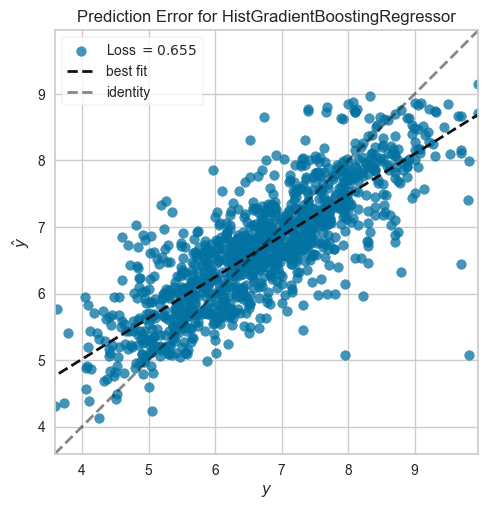

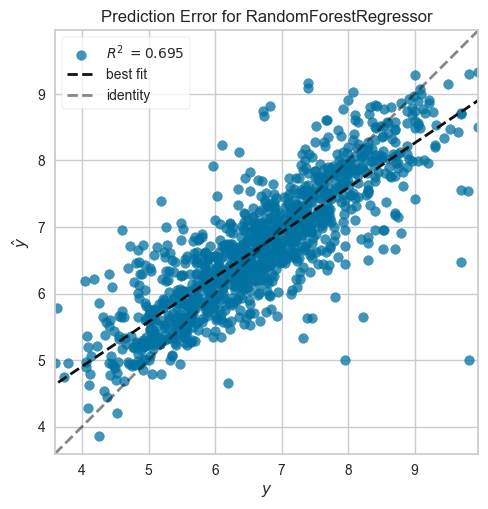

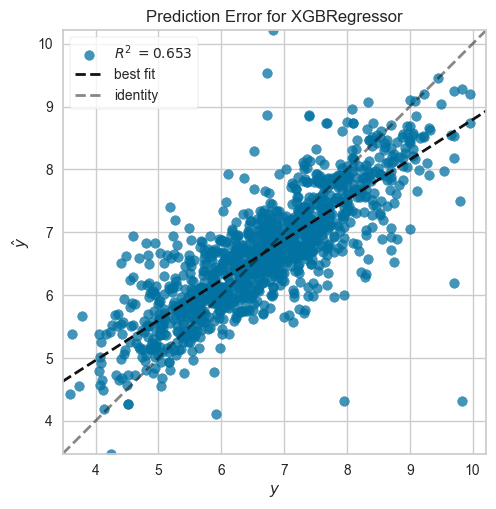

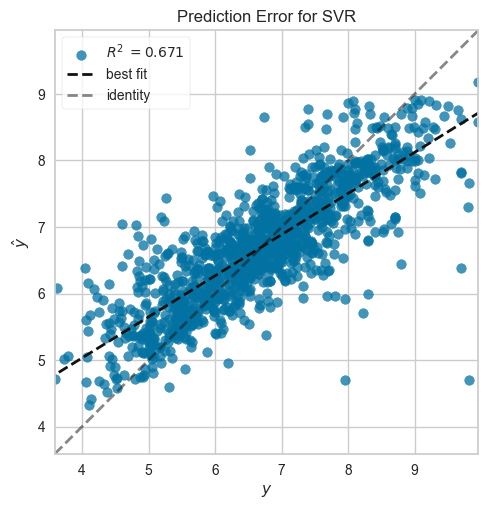

In [39]:
# Training the model and visualizing the performance
# The Loss is reported as R^2
# Hist Gradient Boosting Regressor
visual_Hist = prediction_error(regress_Hist,       # model
                               np.stack(train.fp), # training data 
                               train.pIC50,        # training labels    
                               np.stack(test.fp),  # test data
                               test.pIC50)         # test labels

# Random Forest Regressor
visual_RF = prediction_error(regress_RF,       # model
                             np.stack(train.fp), # training data 
                             train.pIC50,        # training labels    
                             np.stack(test.fp),  # test data
                             test.pIC50)         # test labels

# XGBoost Regressor
visual_XGB = prediction_error(regress_XGB,       # model
                              np.stack(train.fp), # training data 
                              train.pIC50,        # training labels    
                              np.stack(test.fp),  # test data
                              test.pIC50)         # test labels

# Support Vector Regressor
visual_SVR = prediction_error(regress_SVR,       # model
                              np.stack(train.fp), # training data 
                              train.pIC50,        # training labels    
                              np.stack(test.fp),  # test data
                              test.pIC50)         # test labels

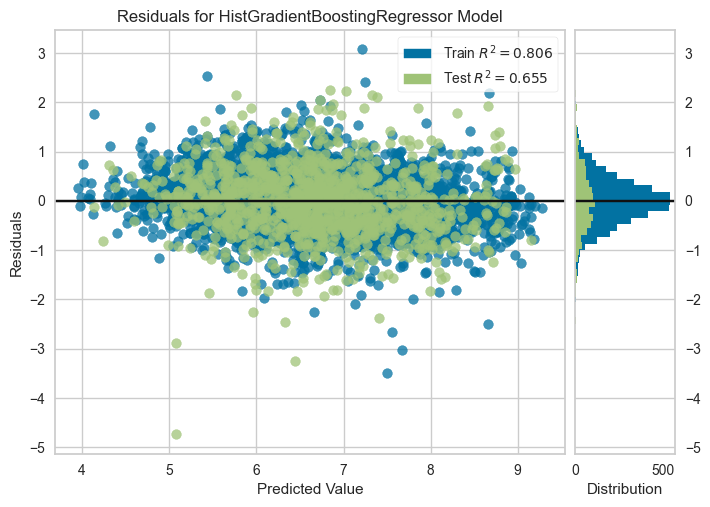

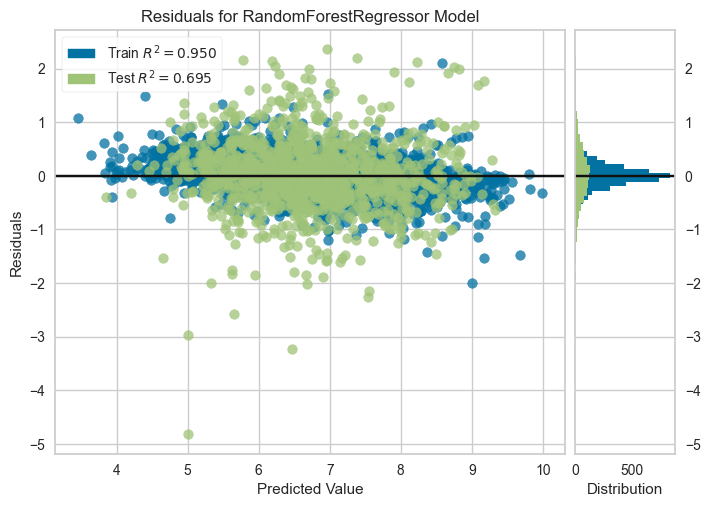

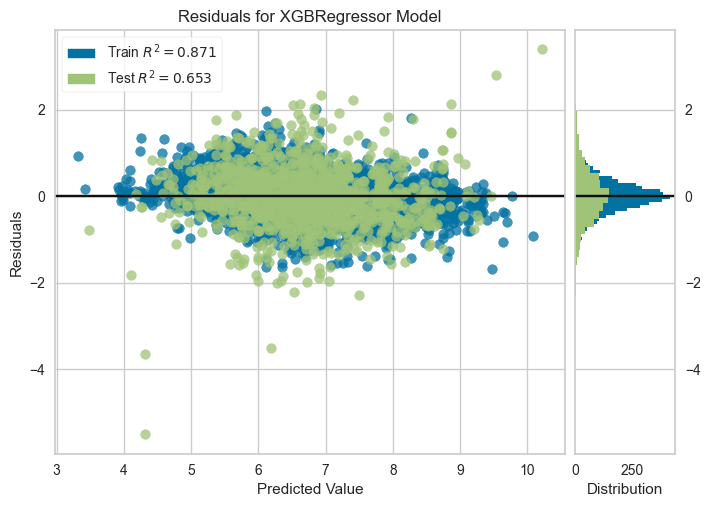

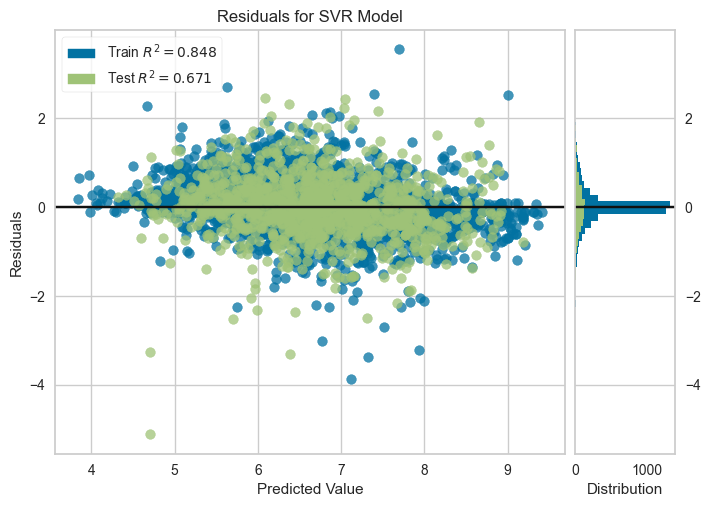

In [38]:
# Visualizing residual plots for the three models
# Residual plots help in visualizing the performance of the model

# Residual plot for Hist Gradient Boosting Regressor
viz_Hist = residuals_plot(regress_Hist, 
                          np.stack(train.fp), 
                          train.pIC50, 
                          np.stack(test.fp), 
                          test.pIC50)

# Residueal plot for Random Forest Regressor
viz_RF = residuals_plot(regress_RF, 
                        np.stack(train.fp), 
                        train.pIC50, 
                        np.stack(test.fp), 
                        test.pIC50)

# Residual plot for XGBoost Regressor
viz_XGB = residuals_plot(regress_XGB, 
                         np.stack(train.fp), 
                         train.pIC50, 
                         np.stack(test.fp), 
                         test.pIC50)

# Residual plot for Support Vector Regressor
viz_SVR = residuals_plot(regress_SVR, 
                         np.stack(train.fp), 
                         train.pIC50, 
                         np.stack(test.fp), 
                         test.pIC50)